In [6]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load CSV file into a pandas dataframe
path_arjun = 'E:\programming\projects\Internship-Assignment\wine.csv'
path_naresh = '/kaggle/input/wineinternship/winedateset.csv'

df = pd.read_csv(path_arjun, encoding='ISO-8859-1')

# Display the first few rows of the dataframe
#print(df.head(5))

print(df.head(5)['review_title'])

0                           nicosia  vulk bianco  etna
1              rainstorm  pinot gris willamette valley
2    st julian  reserve late harvest riesling lake ...
3    sweet cheeks  vintners reserve wild child bloc...
4                      trimbach  gewurztraminer alsace
Name: review_title, dtype: object


country
US           47133
France       18365
Italy        11143
Argentina     3119
Spain         3092
Australia     1257
Canada         212
Name: count, dtype: int64


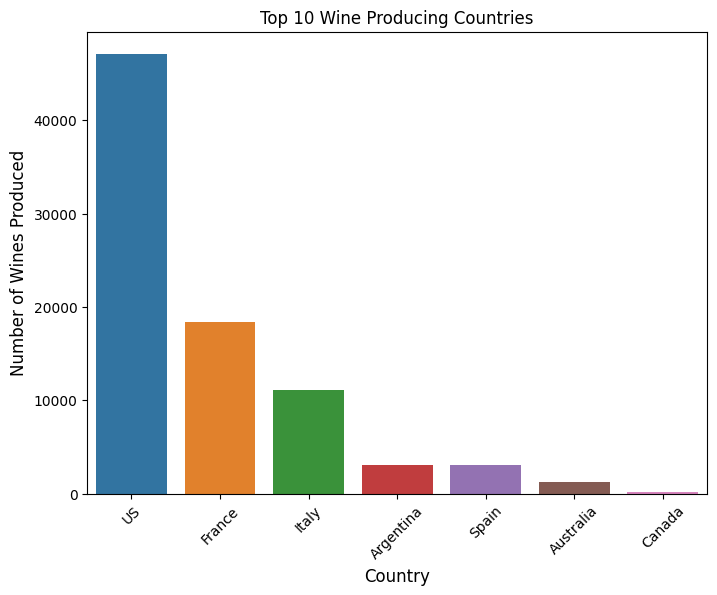

In [9]:
# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create the count plot
sns.countplot(x='country', data=df, order=df['country'].value_counts().index[:10])

print(df['country'].value_counts())

# Set the title of the plot
plt.title('Top 10 Wine Producing Countries')

# Set the label for the x-axis, its font size, and rotate the tick labels 45 degrees
plt.xlabel('Country', fontsize=12)
plt.xticks(rotation=45)

# Set the label for the y-axis and its font size
plt.ylabel('Number of Wines Produced', fontsize=12)

# Show the plot
plt.show()



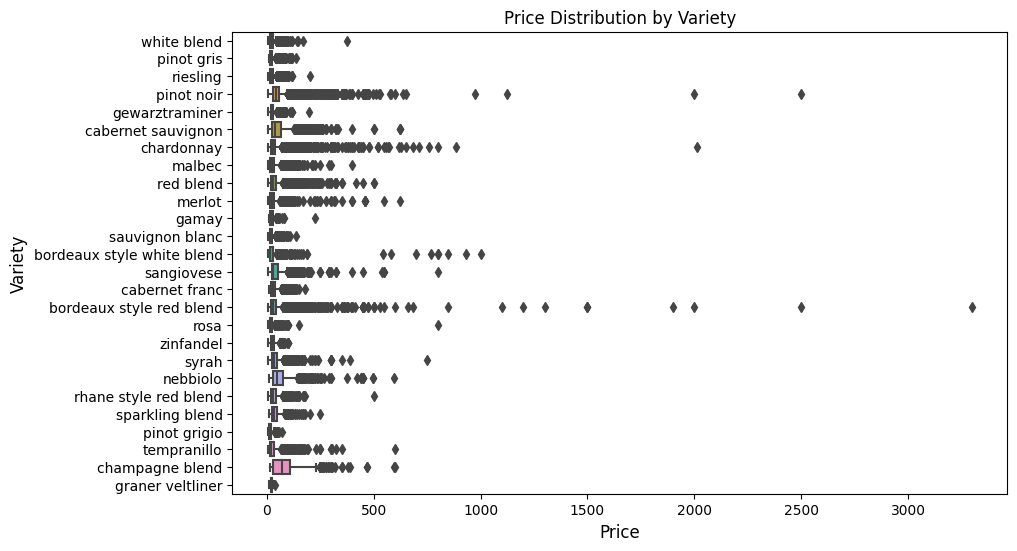

In [10]:
# Set the size of the figure
plt.figure(figsize=(10, 6))

# Create the box plot
sns.boxplot(x='price', y='variety', data=df, orient='h')

# Set the title of the plot
plt.title('Price Distribution by Variety')

# Set the label for the x-axis and its font size
plt.xlabel('Price', fontsize=12)

# Set the label for the y-axis and its font size
plt.ylabel('Variety', fontsize=12)

# Show the plot
plt.show()

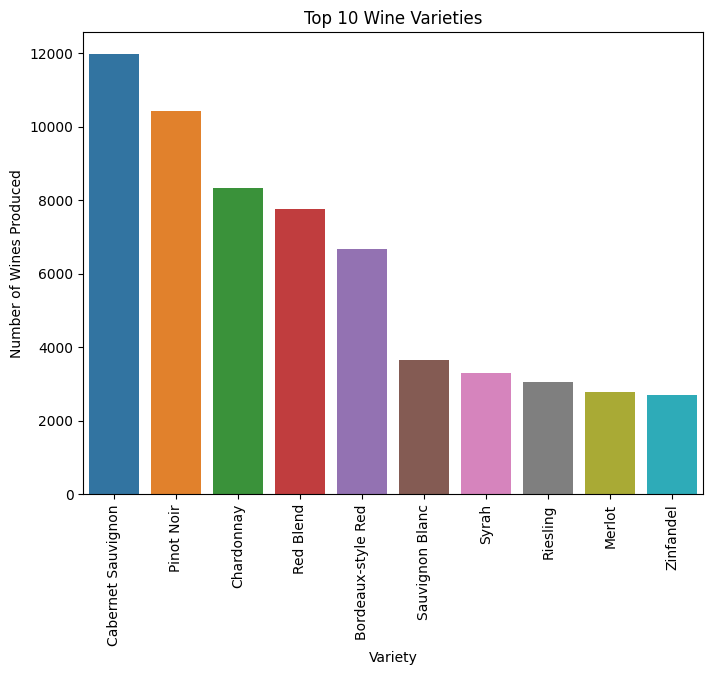

In [11]:
# Set the size of the figure
plt.figure(figsize=(8, 6))

# Create the count plot
sns.countplot(x='variety', data=df, order=df['variety'].value_counts().index[:10])

# Set the title of the plot
plt.title('Top 10 Wine Varieties')

# Set the label for the x-axis and its font size
plt.xlabel('Variety', fontsize=10)

# Set the label for the y-axis
plt.ylabel('Number of Wines Produced')

# Set the font size of the x-axis tick labels and rotate them 90 degrees
plt.xticks(rotation=90, fontsize=10)

# Set the custom labels for each bar on the x-axis
plt.gca().set_xticklabels(['Cabernet Sauvignon', 'Pinot Noir', 'Chardonnay', 'Red Blend', 'Bordeaux-style Red', 'Sauvignon Blanc', 'Syrah', 'Riesling', 'Merlot', 'Zinfandel'])

# Show the plot
plt.show()

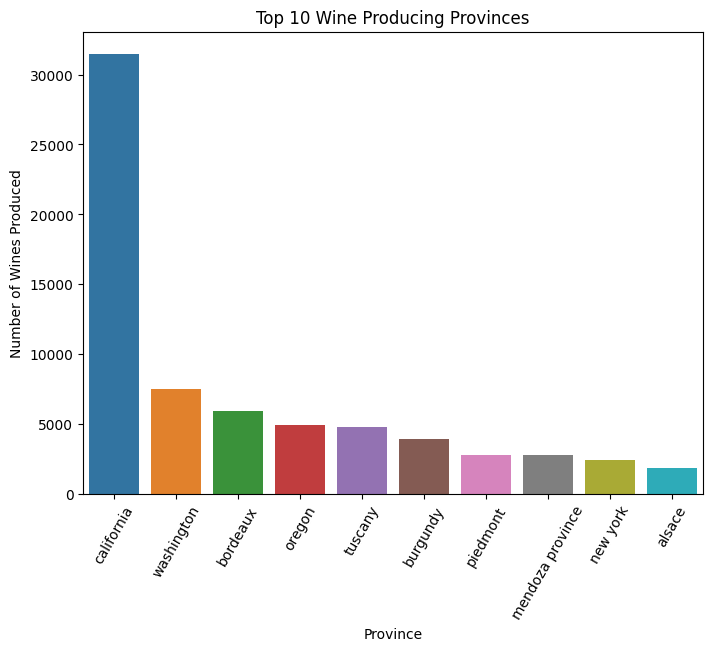

In [12]:
# Create a bar plot of the top 10 wine-producing provinces in the dataset
plt.figure(figsize=(8, 6))
sns.countplot(x='province', data=df, order=df['province'].value_counts().index[:10])

# Add a title and axis labels to the plot
plt.title('Top 10 Wine Producing Provinces')
plt.xlabel('Province')
plt.ylabel('Number of Wines Produced')

# Rotate the x-axis labels to make them more readable
plt.xticks(rotation=60)

# Show the plot
plt.show()

In [13]:
# Print the average, minimum, and maximum wine ratings in the dataset
print('Average Wine Rating:', round(df['points'].mean(), 2))
print('Minimum Wine Rating:', df['points'].min())
print('Maximum Wine Rating:', df['points'].max())

Average Wine Rating: 88.64
Minimum Wine Rating: 80
Maximum Wine Rating: 100


In [27]:
# Print the most expensive and cheapest wine in the dataset
print('Most Expensive Wine:', df['price'].max())
print('Cheapest Wine:', df['price'].min())

print(df.loc[df['price'] == df['price'].min()].count())
df.loc[df['price'] == df['price'].min()]['variety']

Most Expensive Wine: 3300
Cheapest Wine: 4
country               5
review_title          5
review_description    5
points                5
price                 5
province              5
winery                5
variety               5
year                  5
region                5
dtype: int64


1283                  syrah
13187           white blend
39898    cabernet sauvignon
73105           tempranillo
75898           white blend
Name: variety, dtype: object

In [37]:
# Identify top 10 most reviewed wines
top_10_wines = df.groupby('review_title')['review_description'].count().sort_values(ascending=False).head(10)
print("Top 10 Most Reviewed Wines:\n", top_10_wines)

# Identify countries with the highest rated wines
country_rating = df.groupby( 'country')['points'].mean().sort_values(ascending=False)
print("\nCountries with the Highest Rated Wines:\n", country_rating)

df.groupby("review_title")['review_description'].count().head(10)

Top 10 Most Reviewed Wines:
 review_title
cameron hughes  lot  cabernet sauvignon napa valley              19
chteau malarticlagravire   pessaclognan                          15
chteau couhinslurton   pessaclognan                              15
chteau pape clment   pessaclognan                                15
chteau smith haut lafitte   pessaclognan                         14
domaine de chevalier   pessaclognan                              14
chteau bouscaut   pessaclognan                                   13
sebastiani  cherryblock cabernet sauvignon sonoma valley         13
chteau olivier   pessaclognan                                    12
duttongoldfield  dutton ranch pinot noir russian river valley    12
Name: review_description, dtype: int64

Countries with the Highest Rated Wines:
 country
Canada       89.311321
Italy        88.977475
France       88.896488
US           88.668937
Australia    88.014320
Spain        87.386158
Argentina    86.848349
Name: points, dtype: float64

review_title
  merlot lodi                                                1
  oak wines  cabernet sauvignon napa valley                  1
  oak wines  proprietary red napa valley                     2
  oak wines  reserve cabernet sauvignon oakville             1
  oak wines  zinfandel oakville                              1
  ros amador county                                          1
  ros cabernet sauvignon peneds                              1
  sangiovese central coast                                   1
 badge beverage  gehricke chardonnay russian river valley    1
 ball  zinfandel california                                  1
Name: review_description, dtype: int64

In [38]:
from collections import Counter
import re

# Define a function to count the occurrences of each word in a column of text
def get_word_counts(column):
    words = []
    for review in column:
        words += re.findall(r'\w+', review.lower()) #r'\w' matches any word character
    return Counter(words)

# Count the most common words in the review_title column
title_counts = get_word_counts(df['review_title'])
print(title_counts.most_common(10)) #most_common() function of dict gives the most common occurance of word in form of tuple

# Count the most common words in the review_description column
description_counts = get_word_counts(df['review_description'])
print(description_counts.most_common(10))


[('valley', 22278), ('pinot', 12833), ('sauvignon', 10961), ('vineyard', 10713), ('noir', 10507), ('red', 10425), ('de', 9819), ('cabernet', 9572), ('chardonnay', 8127), ('chteau', 7293)]
[('and', 223808), ('the', 143703), ('a', 116298), ('of', 110350), ('with', 76620), ('this', 74042), ('is', 60199), ('wine', 51732), ('in', 43421), ('flavors', 40468)]


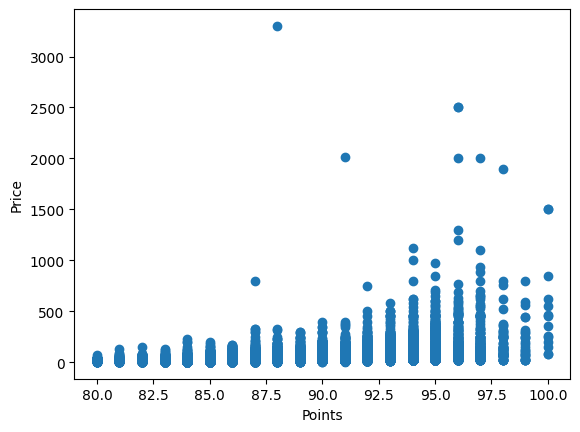

[[1.         0.39323711]
 [0.39323711 1.        ]]


In [39]:
# scatter plot of points vs. price
plt.scatter(df['points'], df['price'])
plt.xlabel('Points')
plt.ylabel('Price')
plt.show()

# compute the correlation coefficient between points and price
corr = np.corrcoef(df['points'], df['price'])
print(corr)


In [40]:
# Correlation between wine ratings and prices
corr = df[['points', 'price']].corr()
print(corr)

# Identify wines with high ratings but low prices
df.loc[(df['points'] > 90) & (df['price'] < 20)]


          points     price
points  1.000000  0.393237
price   0.393237  1.000000


,country,review_title,review_description,points,price,province,winery,variety,year,region
85,France,pierre sparr alsace one white alsace,attractive midgold color with intense aromas o...,91,13,alsace,pierre sparr,white blend,2008,alsace
432,France,chteau riotor ros ctes de provence,produced by the owners of chteauneufdupape est...,91,17,provence,chacteau riotor,rosa,2014,ca tes de provence
951,France,chteau blaignan mdoc,aromatic hints of new wood translate onto the ...,92,16,bordeaux,chacteau blaignan,bordeaux style red blend,2010,ma doc
1334,US,broman sauvignon blanc napa valley,this brilliant sauvignon blanc should be scoop...,91,17,california,broman,sauvignon blanc,2008,napa valley
1952,US,opolo summit creek zinfandel paso robles,although one of the cheaper zins in the winery...,91,19,california,opolo,zinfandel,2014,paso robles
...,...,...,...,...,...,...,...,...,...,...
83456,France,famille laplace domaine mourou red madiran,one of several properties owned by the laplace...,91,16,southwest france,famille laplace,red blend,2014,madiran
83570,France,richard rottiers la sambinerie beaujolaisvil...,from one of the rising stars in beaujolais thi...,91,19,beaujolais,richard rottiers,gamay,2014,beaujolais villages
83686,US,seven hills dry ros columbia valley wa,principally cabernet franc with small amounts ...,91,17,washington,seven hills,rosa,2014,columbia valley
84057,France,domaine des carteresses tavel,its hard to believe its possible to buy this q...,93,15,rh ne valley,domaine des carteresses,rosa,2016,tavel


In [41]:
# Identify most popular grape varieties by region
popular_grapes = df.groupby(['region', 'variety'])['review_description'].count().sort_values(ascending=False).reset_index()
popular_grapes.groupby('region').head(15)

,region,variety,review_description
0,napa valley,cabernet sauvignon,1770
1,barolo,nebbiolo,1599
2,willamette valley,pinot noir,1453
3,russian river valley,pinot noir,1442
4,sonoma coast,pinot noir,970
...,...,...,...
3897,sonoma,sparkling blend,1
3898,sonoma,sauvignon blanc,1
3899,sonoma,pinot noir,1
3900,sonoma,gamay,1


In [43]:
# importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# loading the dataset
wine_data = pd.read_csv(path_arjun, encoding='ISO-8859-1')

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data['review_description'], wine_data['variety'], test_size=0.2, random_state=42)

# vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)
X_test_vectorized = vectorizer.transform(X_test)

print("x_train_vect:",X_test_vectorized)

# training the logistic regression model
model = LogisticRegression()
model.fit(X_train_vectorized, y_train)

# making predictions on the test set
y_pred = model.predict(X_test_vectorized)

# evaluating the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


x_train_vect:   (0, 30866)	0.17932087491536325
  (0, 28675)	0.23011939640466259
  (0, 27760)	0.30429898621103507
  (0, 26706)	0.10281680258656052
  (0, 25298)	0.22923881180107009
  (0, 24568)	0.23646675858451346
  (0, 24137)	0.21775909118290832
  (0, 23346)	0.1025545656081391
  (0, 13938)	0.13447135478667302
  (0, 12795)	0.16311579556903882
  (0, 12278)	0.14130754532574935
  (0, 11605)	0.23611121223988085
  (0, 11364)	0.06154984262272737
  (0, 9877)	0.1778204487841972
  (0, 9678)	0.2240054140865725
  (0, 8870)	0.17176175438703248
  (0, 8679)	0.2564888960706214
  (0, 8361)	0.11977422541315408
  (0, 8154)	0.13672500063227377
  (0, 7816)	0.1559308372746222
  (0, 6846)	0.1469251002710699
  (0, 6602)	0.24064068756152146
  (0, 6489)	0.17837963197338047
  (0, 5971)	0.08552443065657211
  (0, 4999)	0.34624965104339545
  :	:
  (16864, 26423)	0.2094075525270341
  (16864, 26394)	0.2512823247862519
  (16864, 22652)	0.23361675079819794
  (16864, 21980)	0.22430444221529108
  (16864, 20712)	0.10659086

c:\Users\arjun\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [62]:
#print(X_test_vectorized)
#print(X_test)

text = "very bad wine very very very very very very ery bad wine very very very very very very "

review_my = vectorizer.transform([text])

review_my

pred = model.predict(review_my)

In [46]:
#pickling the model for later use

import pickle

with open('log_reg_wine.pkl','wb') as f:
    
    pickle.dump(model,f)

f.close()




In [63]:
with open ('log_reg_wine.pkl','rb') as f:

    model = pickle.load(f)

f.close()

pred = model.predict(review_my)

pred


array(['pinot noir'], dtype=object)

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
import pandas as pd

path_arjun = 'E:\programming\projects\Internship-Assignment\wine.csv'

wine_data = pd.read_csv(path_arjun, encoding='ISO-8859-1')

# splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(wine_data['review_description'], wine_data['variety'], test_size=0.2, random_state=42)

# vectorizing the text data
vectorizer = TfidfVectorizer(stop_words='english')
X_train_vectorized = vectorizer.fit_transform(X_train)

import pickle

text = "very bad wine very very very very very very ery bad wine very very very very very very "
review_my = vectorizer.transform([text])
review_my

class classifier:

    def __init__(self,text) -> None:
        print(text)
        self.transformed_sentence = vectorizer.transform([text])

    
    def classify(self):

        with open ('log_reg_wine.pkl','rb') as f:
            model = pickle.load(f)
        f.close()

        print(model.predict(self.transformed_sentence))

cl = classifier(text)
cl.classify()

very bad wine very very very very very very ery bad wine very very very very very very 
['pinot noir']


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load the dataset
df = pd.read_csv('/kaggle/input/wineinternship/winedateset.csv', encoding='ISO-8859-1')

# Select the relevant features for the model
X = df[['country', 'review_title', 'review_description', 'year', 'points', 'price', 'province', 'region', 'winery']]
y = df['variety']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Vectorize the text features (review_title, review_description)
vectorizer = TfidfVectorizer()
X_train_title = vectorizer.fit_transform(X_train['review_title'])
X_test_title = vectorizer.transform(X_test['review_title'])
X_train_desc = vectorizer.fit_transform(X_train['review_description'])
X_test_desc = vectorizer.transform(X_test['review_description'])

# Combine the vectorized features with the numerical features (year, points, price)
X_train_final = pd.concat([X_train[['year', 'points', 'price']].reset_index(drop=True), 
                           pd.DataFrame(X_train_title.toarray()), pd.DataFrame(X_train_desc.toarray()), 
                           X_train[['country', 'province', 'region', 'winery']].reset_index(drop=True)], axis=1)
X_test_final = pd.concat([X_test[['year', 'points', 'price']].reset_index(drop=True), 
                          pd.DataFrame(X_test_title.toarray()), pd.DataFrame(X_test_desc.toarray()), 
                          X_test[['country', 'province', 'region', 'winery']].reset_index(drop=True)], axis=1)

# Train the Random Forest Classifier model
rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train_final, y_train)

# Predict the wine variety for the testing set
y_pred = rfc.predict(X_test_final)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)
